### OKX Exploring Data

### Setup

In [465]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [466]:
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

In [467]:
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Image saved as {file_path}')

#### Recovering the data

In [468]:
import pandas as pd

In [469]:
ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "datasets"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [470]:
def load_okx_data(ldd_path = LDD_PATH):
  excel_path = os.path.join(ldd_path, 'OsteoporosisKneeX-ray.xlsx')
  return pd.read_excel(excel_path)

#### Understanding the data structure

In [471]:
okx = load_okx_data()

In [472]:
okx.head()

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,OP1,yes,male,65,NaN,1.64592,65,yes,no,...,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,osteopenia
1,2,OP2,yes,female,54,46.0,1.67640,78,no,no,...,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,osteopenia
2,3,OP3,yes,female,49,43.0,1.37160,59,no,no,...,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,osteopenia
3,4,OP4,yes,female,57,40.0,1.52400,72,no,no,...,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,osteopenia
4,5,OP5,yes,female,40,NaN,1.49352,54,no,no,...,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,osteopenia


In [473]:
okx.columns

Index(['S.No', 'Patient Id', 'Joint Pain:', 'Gender', 'Age', 'Menopause Age',
       'height  (meter)', 'Weight (KG) ', 'Smoker', 'Alcoholic', 'Diabetic',
       'Hypothyroidism', 'Number of Pregnancies', 'Seizer Disorder',
       'Estrogen Use', 'Occupation ', 'History of Fracture', 'Dialysis:',
       'Family History of Osteoporosis', 'Maximum Walking distance (km)',
       'Daily Eating habits', 'Medical History', 'T-score Value',
       'Z-Score Value', 'BMI: ', 'Site', 'Obesity', 'Diagnosis'],
      dtype='object')

In [474]:
# Removing unnecessary columns
okx = okx.drop(columns=['S.No', 'Patient Id', 'Menopause Age', 'height  (meter)', 'Weight (KG) ', 'Number of Pregnancies', 'Site'])

In [475]:
okx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Joint Pain:                     240 non-null    object 
 1   Gender                          240 non-null    object 
 2   Age                             240 non-null    int64  
 3   Smoker                          240 non-null    object 
 4   Alcoholic                       240 non-null    object 
 5   Diabetic                        240 non-null    object 
 6   Hypothyroidism                  240 non-null    object 
 7   Seizer Disorder                 240 non-null    object 
 8   Estrogen Use                    240 non-null    object 
 9   Occupation                      236 non-null    object 
 10  History of Fracture             240 non-null    object 
 11  Dialysis:                       240 non-null    object 
 12  Family History of Osteoporosis  240 

In [476]:
# Visualizing the distribution of the target variable
okx['Diagnosis'].value_counts()

Diagnosis
osteopenia      154
osteoporosis     49
normal           37
Name: count, dtype: int64

In [477]:
okx.describe()

,Age,Maximum Walking distance (km),T-score Value,Z-Score Value,BMI:
count,240.000000,239.000000,240.000000,240.000000,240.000000
mean,51.045833,1.940167,-1.833625,-1.327292,27.590448
std,12.622040,1.991257,0.687243,0.675927,4.043308
min,17.000000,0.100000,-2.990000,-2.990000,16.139658
25%,44.750000,0.500000,-2.322500,-1.820000,24.956260
50%,50.000000,1.000000,-2.010000,-1.190000,27.285722
75%,60.000000,3.000000,-1.287500,-0.852500,30.210129
max,107.000000,10.000000,-0.160000,0.730000,42.754389


In [478]:
# histogram for numeric attributes
%matplotlib inline
import matplotlib.pyplot as plt

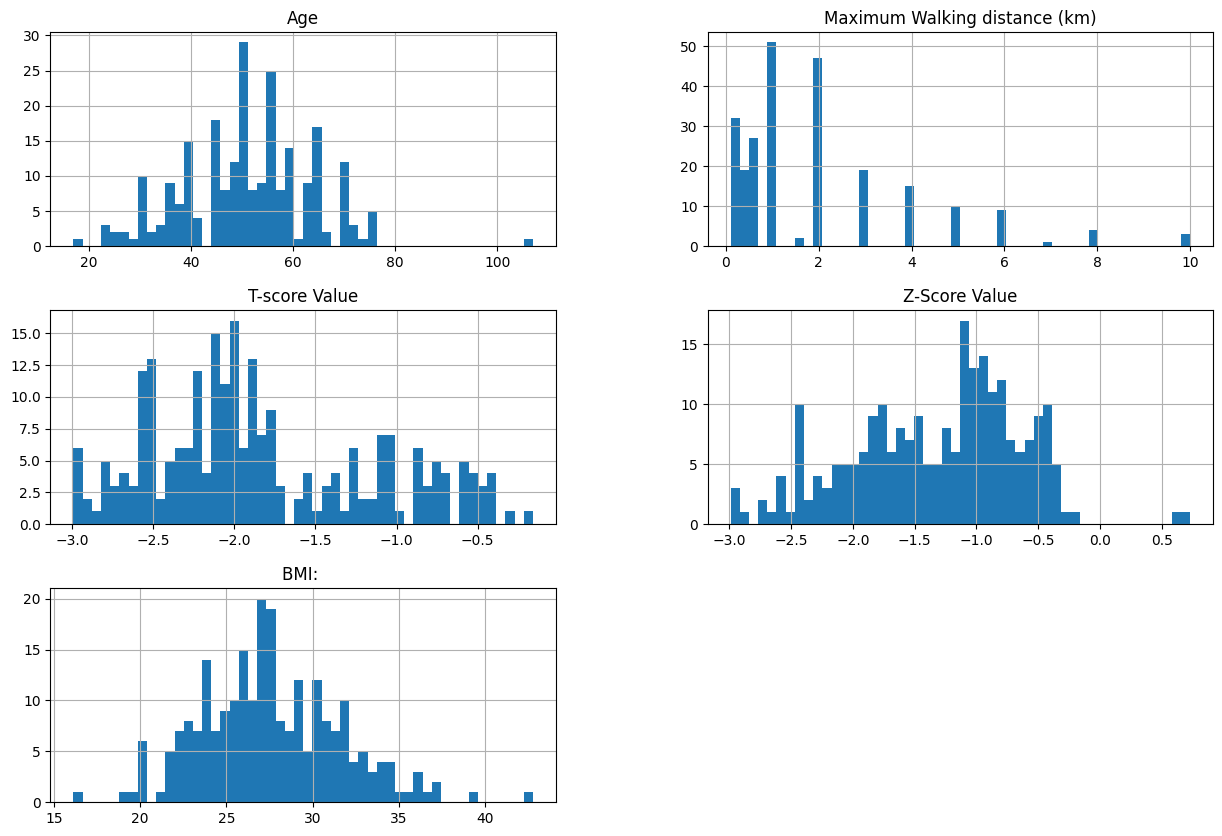

In [479]:
okx.hist(bins=50, figsize=(15, 10))
plt.show()

#### Exploring the Data

In [480]:
import seaborn as sns

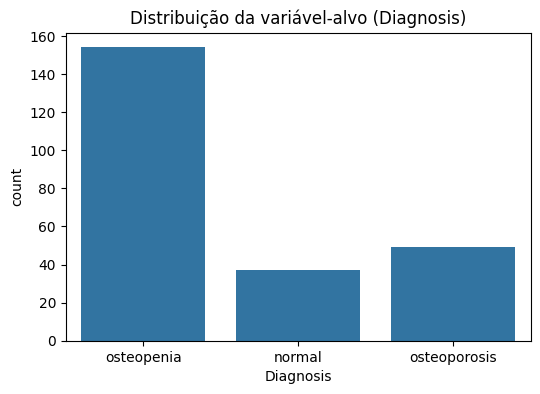

In [481]:
plt.figure(figsize=(6,4))
sns.countplot(data=okx, x="Diagnosis")
plt.title("Distribuição da variável-alvo (Diagnosis)")
plt.show()

In [482]:
numerical_cols = okx.select_dtypes(include=np.number).columns

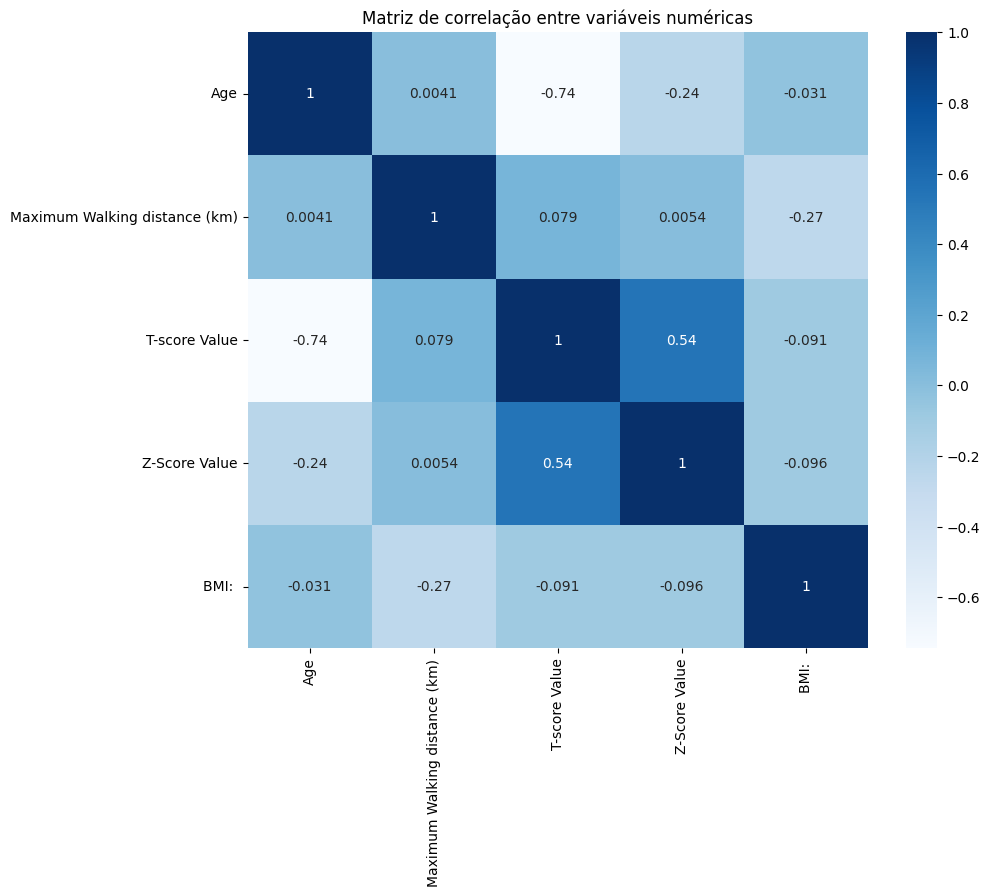

In [483]:
plt.figure(figsize=(10,8))
sns.heatmap(okx[numerical_cols].corr(), annot=True, cmap="Blues")
plt.title("Matriz de correlação entre variáveis numéricas")
plt.show()

#### Handling missing values

In [484]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [485]:
numeric_features = okx.select_dtypes(include=['int64', 'float64']).columns
categorical_features = okx.select_dtypes(exclude=['int64', 'float64']).columns

In [486]:
numeric_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [487]:
preprocessor = ColumnTransformer(
  transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
  ]
)

In [488]:
okx_clean = preprocessor.fit_transform(okx)

In [489]:
okx_preprocessed = pd.DataFrame(okx_clean, columns=list(numeric_features) + list(categorical_features))

In [490]:
okx_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             240 non-null    object
 1   Maximum Walking distance (km)   240 non-null    object
 2   T-score Value                   240 non-null    object
 3   Z-Score Value                   240 non-null    object
 4   BMI:                            240 non-null    object
 5   Joint Pain:                     240 non-null    object
 6   Gender                          240 non-null    object
 7   Smoker                          240 non-null    object
 8   Alcoholic                       240 non-null    object
 9   Diabetic                        240 non-null    object
 10  Hypothyroidism                  240 non-null    object
 11  Seizer Disorder                 240 non-null    object
 12  Estrogen Use                    240 non-null    ob

#### Identifying outliers

In [491]:
from sklearn.preprocessing import PowerTransformer

In [492]:
def detect_and_remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    outliers_dict = {}
    
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR

        mask_out = (df_clean[col] < lim_inf) | (df_clean[col] > lim_sup)
        outliers = df_clean[mask_out]

        outliers_dict[col] = outliers
        df_clean = df_clean[~mask_out]

    all_outliers = pd.concat(outliers_dict.values()).drop_duplicates()

    return df_clean, outliers_dict, all_outliers


In [493]:
okx_no_outliers, outliers_por_coluna, outliers_total = detect_and_remove_outliers_iqr(
    okx_preprocessed,
    numeric_features
)

print("Tamanho original:", okx_preprocessed.shape)
print("Tamanho sem outliers:", okx_no_outliers.shape)
print("Total de outliers detectados:", outliers_total.shape)

Tamanho original: (240, 21)
Tamanho sem outliers: (226, 21)
Total de outliers detectados: (14, 21)


In [494]:
for col, df_out in outliers_por_coluna.items():
    print(f"\n--- Outiliers em {col} ({df_out.shape[0]} registros) ---")
    display(df_out[[col]])


--- Outiliers em Age (2 registros) ---


,Age
157,107.0
161,17.0



--- Outiliers em Maximum Walking distance (km) (8 registros) ---


,Maximum Walking distance (km)
29,8.0
72,8.0
87,8.0
125,8.0
148,7.0
160,10.0
164,10.0
176,10.0



--- Outiliers em T-score Value (0 registros) ---


,T-score Value



--- Outiliers em Z-Score Value (1 registros) ---


,Z-Score Value
0,0.73



--- Outiliers em BMI:  (3 registros) ---


,BMI:
8,16.139658
190,42.754389
204,39.335462


In [495]:
pt = PowerTransformer(method='yeo-johnson')

okx_transformed = okx_no_outliers.copy()
okx_transformed[numeric_features] = pt.fit_transform(okx_no_outliers[numeric_features])

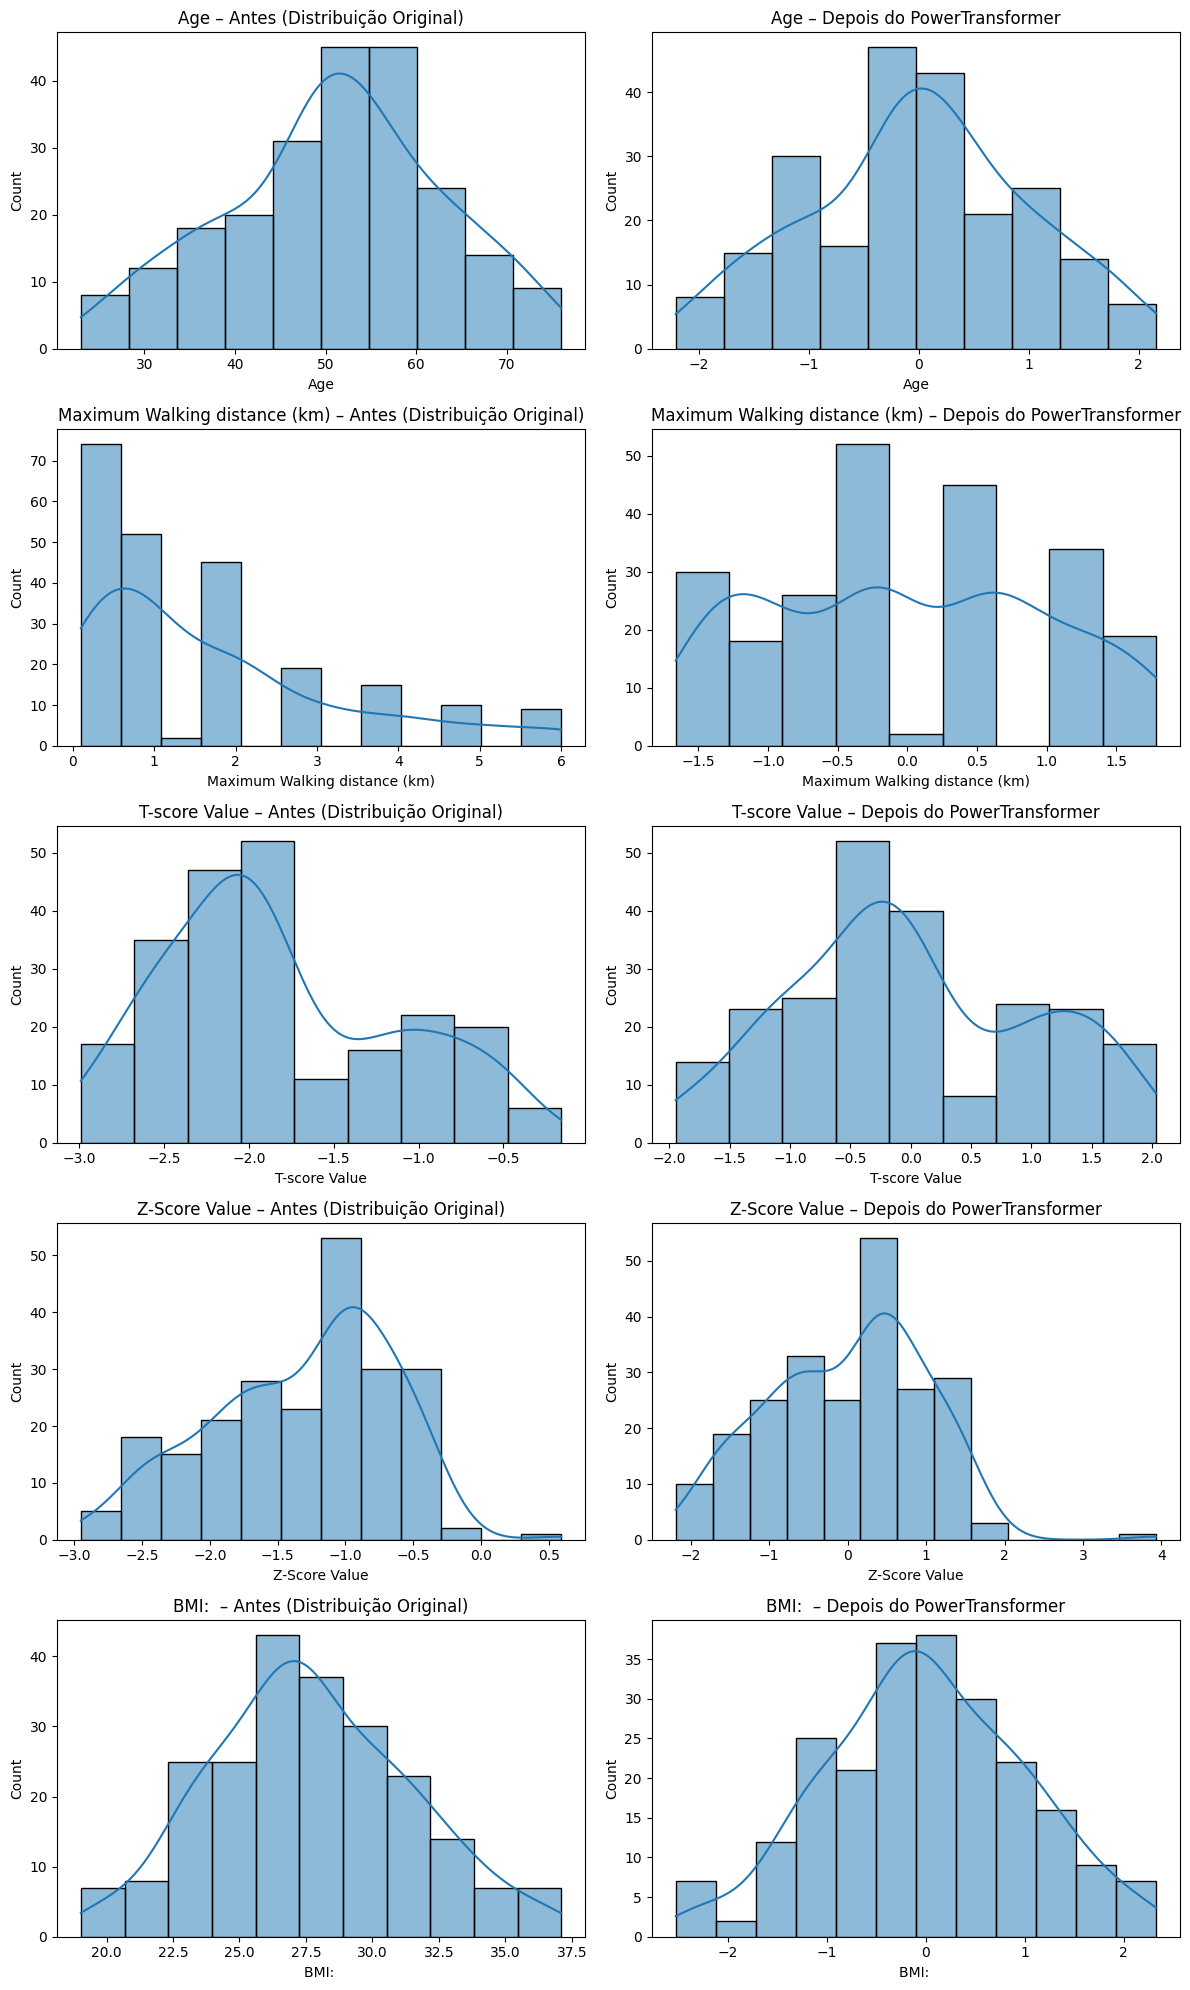

In [496]:
fig, axes = plt.subplots(len(numeric_features), 2, figsize=(12, 4*len(numeric_features)))

for i, col in enumerate(numeric_features):
    # Antes
    sns.histplot(okx_no_outliers[col], kde=True, ax=axes[i,0])
    axes[i,0].set_title(f"{col} – Antes (Distribuição Original)")
    
    # Depois (PowerTransformer)
    sns.histplot(okx_transformed[col], kde=True, ax=axes[i,1])
    axes[i,1].set_title(f"{col} – Depois do PowerTransformer")

plt.tight_layout()
plt.show()

#### Categorical Encoding (One-Hot / LabelEncoder)

In [497]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [498]:
label = LabelEncoder()
okx_transformed['Diagnosis'] = label.fit_transform(okx_transformed['Diagnosis'])

In [499]:
okx_transformed['Diagnosis'].value_counts()

#osteopenia -> 1
#osteoporosis -> 2
#normal -> 0

Diagnosis
1    146
2     45
0     35
Name: count, dtype: int64

In [500]:
okx_final = pd.get_dummies(okx_transformed, columns=categorical_features.drop("Diagnosis"), drop_first=True)

#### Data normalization

In [501]:
scaler = StandardScaler()

In [502]:
X = okx_final.drop("Diagnosis", axis=1)
y = okx_final["Diagnosis"]

X_scaled = scaler.fit_transform(X)

#### Creating a test suite

In [503]:
from sklearn.model_selection import train_test_split

In [504]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#### Balancing the data

In [505]:
from imblearn.over_sampling import SMOTE

In [506]:
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

In [507]:
print("\nDistribuição original:", y_train.value_counts())
print("Distribuição balanceada:", y_train_bal.value_counts())


Distribuição original: Diagnosis
1    116
2     36
0     28
Name: count, dtype: int64
Distribuição balanceada: Diagnosis
0    116
1    116
2    116
Name: count, dtype: int64


#### Saving the datasets

In [508]:
okx_preprocessed.to_csv("okx_preprocessed.csv", index=False)
print("✔ Arquivo salvo: okx_preprocessed.csv")

okx_no_outliers.to_csv("okx_no_outliers.csv", index=False)
print("✔ Arquivo salvo: okx_no_outliers.csv")

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test, columns=X.columns)

X_train_df.to_csv("X_train.csv", index=False)
X_test_df.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("✔ Arquivos de treino e teste salvos!")

✔ Arquivo salvo: okx_preprocessed.csv
✔ Arquivo salvo: okx_no_outliers.csv
✔ Arquivos de treino e teste salvos!
